In [1]:
import numpy as np
import pandas as pd

# K-Means Algorithm

K-Means algorithm is a clustering algorithm. It is also a classic Expectation-Maximization algorithm.<br> 
Given a set of observations (x1, x2, ..., xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, ..., Sk} so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance) <br>
The Step is as follows:
1. Randomly select k "cluster centers" from the data set;<br>
2. For each iteration (iterate through all points):<br>
(1). Find the nearest center for each point, and store the cluster for each center; <br>
(2). Calculate the new center for each cluster; <br>
(3). If there are no change of the means, end the loop; otherwise iterate. <br>

In [2]:
class KMeans():
    def __init__(self, k = 3, num_iter = 1000):
        """
        Some initializations, if neccesary
        
        Parameter:
            k: Number of clusters we are trying to classify
            num_iter: Number of iterations we are going to loop
        """
        
        self.model_name = 'KMeans'
        self.k = k
        self.num_iter = num_iter
        self.centers = None
        self.RM = None
        
    def train(self, X):
        """
        Train the given dataset
        
        Parameter:
            X: Matrix or 2-D array. Input feature matrix.
            
        Return:
            self: the whole model containing relevant information
        """
        
        r, c = X.shape
        centers = []
        RM = np.zeros((r, self.k))
        
        """
        TODO: 1. Modify the following code to randomly choose the initial centers
        """
        centers = list([X[np.random.choice(len(X)), :]])

        for _ in range(self.k-1):
            distances = []
            for i in range(r):
                curr_dist = min([np.linalg.norm(X[i, :] - c) for c in centers])
                distances.append(curr_dist)
            max_pos = np.argmax(distances)
                
            centers.append(X[max_pos, :])
    
        centers = np.array(centers)
        
        for i in range(self.num_iter):
            for j in range(r):
                """
                TODO: 2. Modify the following code to update the Relation Matrix
                """
                distance = [np.linalg.norm(X[j, :] - c) for c in centers]
                minpos = np.argmin(distance)
                
                temp_rm = np.zeros(self.k)
                temp_rm[minpos] = 1
                RM[j, :] = temp_rm
                
            new_centers = centers.copy()
            
            for l in range(self.k):
                """
                TODO: 3. Modify the following code to update the centers
                """
                row_index = (RM[:, l] == 1).flatten()
                all_l = X[row_index, :]
                new_centers[l, :] = np.array(all_l.mean(axis=0))
                
            if np.sum(new_centers - centers) < 1e-12:
                self.centers = new_centers
                self.RM = RM
                return self
                
            centers = new_centers
            
        self.centers = centers
        self.RM = RM
        
        return self

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [4]:
X = X[:,2:4]

In [5]:
clf = KMeans(k = 3)
model = clf.train(X)

(80, 2)
(50, 2)
(20, 2)


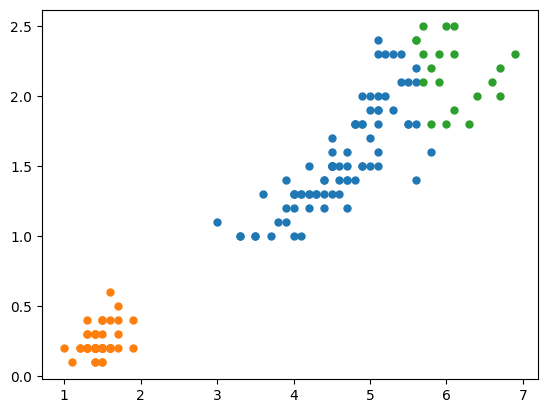

In [6]:
r, c = model.RM.shape
groups = []
for i in range(c):
    index = model.RM[:,i] == 1
    groups.append(X[index])
fig, ax = plt.subplots()
ax.margins(0.05)
for group in groups:
    print(group.shape)
    ax.plot(group[:,0], group[:,1], marker='o', linestyle='', ms=5)

In [7]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X = X[:,[0,2]]

(51, 2)
(17, 2)
(82, 2)


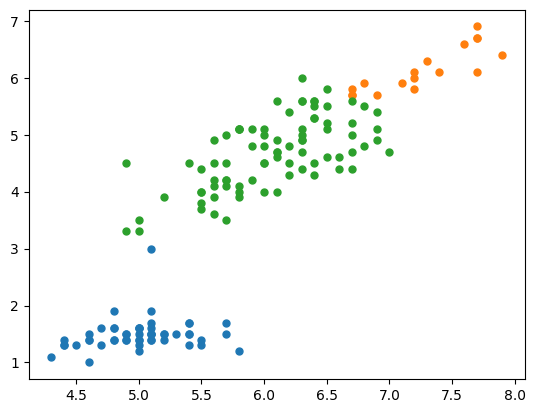

In [8]:
clf = KMeans(k = 3)
model = clf.train(X)
r, c = model.RM.shape
groups = []
for i in range(c):
    index = model.RM[:,i] == 1
    groups.append(X[index])
fig, ax = plt.subplots()
ax.margins(0.05)
for group in groups:
    print(group.shape)
    ax.plot(group[:,0], group[:,1], marker='o', linestyle='', ms=5)

## 3 dimension

In [9]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X = X[:,1:4]

In [10]:
clf = KMeans(k = 3)
model = clf.train(X)

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
groups = []
r, c = model.RM.shape
for i in range(c):
    index = model.RM[:,i] == 1
    groups.append(X[index])

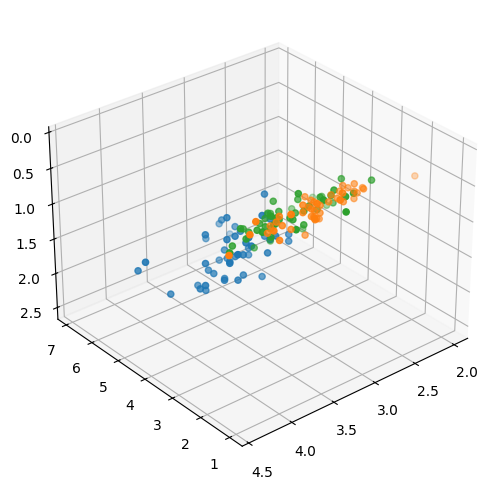

In [13]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(projection='3d', elev=-150, azim=130)
for group in groups:
    ax.scatter(group[:,0], group[:,1], group[:,2], marker='o')

Note: We should expect different results every time we run K-means as the centers are randomly initialized.

# Gaussian Mixture

Gaussian Mixture Algorithm is a softer version of the k-means algorithm. It is also a classic example of the Expectation-Maximization Algorithm. <br>
In Gaussian Mixture Algorithm, we model the data as coming from a mixture of Gaussians.<br>
In this example, we will be using a randomly generated Gaussian Distribution. <br>

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [15]:
X, y = make_blobs(n_samples=500, n_features=3, cluster_std=2)

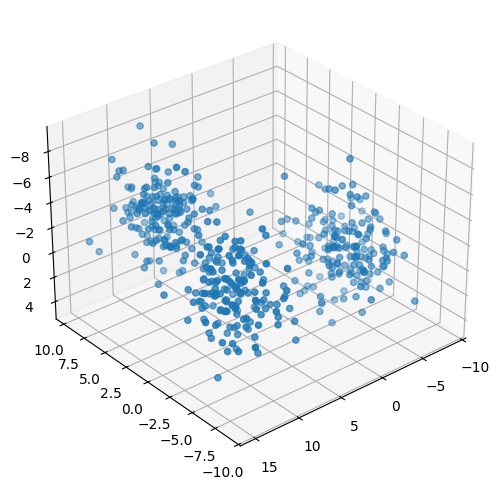

In [16]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(projection='3d', elev = -150, azim = 130)
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o');

In [17]:
def gaussian(X, mu, cov):
    """ 
    Function to create mixtures using the Given matrix X, given covariance and given mu

    Return:
    transformed x.
    """
    
    # X should be matirx-like
    n = X.shape[1]
    diff = (X - mu).T
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) \
                       * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)

def initialize_clusters(X, n_clusters):
    """ 
    Initialize the clusters by storing the information in the data matrix X into the clusters

    Parameter:
        X: Input feature matrix
        n_clusters: Number of clusters we are trying to classify

    Return:
        cluster: List of clusters. Each cluster center is calculated by the KMeans algorithm above.
    """
    clusters = []
    index = np.arange(X.shape[0])
        
    kmeans = KMeans().fit(X)
    mu_k = kmeans.cluster_centers_
    
    for i in range(n_clusters):
        clusters.append({
            'w_k': 1.0 / n_clusters,
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters
    
def expectation_step(X, clusters):
    """ 
    "E-Step" for the GM algorithm

    Parameter:
        X: Input feature matrix
        clusters: List of clusters
    """
    totals = np.zeros((X.shape[0], 1), dtype=np.float64)
    
    for cluster in clusters:
        w_k = cluster['w_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
        
        """
        TODO: 4. Calculate the numerator part of the cluster posterior
        """
        posterior = w_k * gaussian(X, mu_k, cov_k)

        """
        TODO: 5. Calculate the denominator part of the cluster posterior
        """
        totals += posterior
        cluster['posterior'] = posterior
    
    for cluster in clusters:
        """
        TODO: 6. Calculate the cluster posterior using totals
        """
        cluster['totals'] = totals
        cluster['posterior'] = cluster['posterior'] / totals
        
def maximization_step(X, clusters):
    """ 
    "M-Step" for the GM algorithm

    Parameter:
        X: Input feature matrix
        clusters: List of clusters
    """
    N = float(X.shape[0])
  
    for cluster in clusters:
        posterior = cluster['posterior']
        cov_k = np.zeros((X.shape[1], X.shape[1]))
        
        """
        TODO: 7. Calculate the new cluster data
        """        
        N_k = np.sum(posterior, axis=0)
        w_k = N_k / N
        mu_k = np.sum(X * posterior, axis=0) / N_k
        
        for j in range(X.shape[0]):
            diff = (X[j] - mu_k).reshape(-1, 1)
            cov_k += posterior[j] * np.dot(diff, diff.T)
            
        cov_k /= N_k 
        
        cluster['w_k'] = w_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k

def get_likelihood(X, clusters):
    likelihood = []
    sample_likelihoods = np.log(np.array([cluster['totals'] for cluster in clusters]))
    return np.sum(sample_likelihoods), sample_likelihoods

def train_gmm(X, n_clusters, n_epochs):
    clusters = initialize_clusters(X, n_clusters)
    likelihoods = np.zeros((n_epochs, ))
    scores = np.zeros((X.shape[0], n_clusters))

    for i in range(n_epochs):
      
        expectation_step(X, clusters)
        maximization_step(X, clusters)

        likelihood, sample_likelihoods = get_likelihood(X, clusters)
        likelihoods[i] = likelihood
        
    for i, cluster in enumerate(clusters):
        scores[:, i] = np.log(cluster['w_k']).reshape(-1)
        
    return clusters, likelihoods, scores, sample_likelihoods

In [18]:
clusters, likelihoods, scores, sample_likelihoods = train_gmm(X, 3, 100)

In [19]:
from sklearn.cluster import KMeans

In [20]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, max_iter=50).fit(X)
gmm_scores = gmm.score_samples(X)

print('Means by sklearn:\n', gmm.means_)
print('Means by our implementation:\n', np.array([cluster['mu_k'].tolist() for cluster in clusters]))
print('Scores by sklearn:\n', gmm_scores[0:20])
print('Scores by our implementation:\n', sample_likelihoods.reshape(-1)[0:20])

Means by sklearn:
 [[ 9.44244963 -2.59362115 -0.9708154 ]
 [-3.49273379 -2.87914184 -0.62701279]
 [ 9.3623228   5.4604804  -3.47177957]]
Means by our implementation:
 [[ 9.44134543 -2.57789427 -0.97574391]
 [-3.49288758 -2.87923162 -0.62694337]
 [ 9.3630219   5.47354413 -3.47582623]]
Scores by sklearn:
 [-6.48419948 -6.4372743  -6.84287831 -6.06196549 -9.45936747 -6.87019139
 -7.79079707 -7.54612911 -8.61011312 -9.32133486 -6.35836277 -7.611974
 -8.5675713  -8.33404053 -7.30597818 -6.66627226 -6.78795441 -6.58627285
 -6.52734305 -8.23851622]
Scores by our implementation:
 [-6.4877692  -6.43869247 -6.84305575 -6.05834475 -9.4702206  -6.8556512
 -7.79088123 -7.55152944 -8.62333404 -9.31737138 -6.35831183 -7.60806675
 -8.56759763 -8.33386357 -7.31007781 -6.66614897 -6.79313337 -6.58629104
 -6.52774208 -8.23859858]
